<a href="https://colab.research.google.com/github/naenumtou/statisticalModel/blob/main/timeSeriesSlide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%config InlineBackend.figure_format = 'retina'

In [15]:
# Import dataset
df = pd.read_csv('https://raw.githubusercontent.com/naenumtou/statisticalModel/main/datasets/Bayesian_model.csv')

# Target and Features split
X = df.drop(['y'], axis = 1)
y = df['y']

In [16]:
# Sliding window
trainSize = 9
testSize = 3

for i in range(trainSize, X.shape[0], trainSize + testSize):
  print(f'Train index: {np.arange(i - trainSize, i)}')
  print(f'Test index: {np.arange(i, i + testSize)}')

Train index: [0 1 2 3 4 5 6 7 8]
Test index: [ 9 10 11]
Train index: [12 13 14 15 16 17 18 19 20]
Test index: [21 22 23]
Train index: [24 25 26 27 28 29 30 31 32]
Test index: [33 34 35]
Train index: [36 37 38 39 40 41 42 43 44]
Test index: [45 46 47]


In [17]:
# Define time sliding window function
def timeSlide(features, target, trainSize, testSize, newStart = True):
  if newStart == True:
    steps = trainSize + testSize
  else:
    steps = testSize

  model = LinearRegression()
  scores = None

  for i in range(trainSize, features.shape[0], steps):
    XTrain, XTest = features.iloc[i - trainSize:i], features.iloc[i:i + testSize] 
    yTrain, yTest = target.iloc[i - trainSize:i], target.iloc[i:i + testSize]

    # Model training
    model.fit(XTrain, yTrain)

    # Model prediction
    predTrain = model.predict(XTrain)
    predTest = model.predict(XTest)

    # Model score
    scoreTrain = model.score(XTrain, yTrain)
    mseTrain = mean_squared_error(predTrain, yTrain)
    mseTest = mean_squared_error(predTest, yTest)

    score = np.column_stack((scoreTrain, mseTrain, mseTest))

    if scores is None:
      scores = score.copy()
    else:
      scores = np.vstack((scores, score))
    
    scores = pd.DataFrame(scores, columns = ['R2Train', 'MSETrain', 'MSETest'])

    # Plot
    plt.figure(figsize = (7, 3))
    with plt.style.context('seaborn'):
      plt.title(f'R2: {scoreTrain:.2f}, MSETrain: {mseTrain:.2f}, MSETest: {mseTest:.2f}')
      plt.xlabel('Date')
      plt.ylabel('Log odds')
      plt.plot(yTrain, c = 'royalblue', linewidth = 2, label = 'Actual')
      plt.plot(yTest.index, yTest, c = 'royalblue', linewidth = 2, linestyle = '--', label = 'Actual (Val)')
      plt.plot(yTrain.index, predTrain, c = 'firebrick', linestyle = '--', label = 'Predicted')
      plt.plot(yTest.index, predTest, c = 'forestgreen', linestyle = '--', label = 'Out of time')
      plt.axvspan(min(yTrain.index), max(yTrain.index), color = 'red', alpha = 0.3)
      plt.axvspan(min(yTest.index), max(yTest.index), color = 'green', alpha = 0.3)
      plt.xticks(np.arange(1, features.shape[0] + 1, 5))
      plt.yticks(np.arange(target.min(), target.max(), 0.2))
      plt.legend(frameon = True, facecolor = 'white')

  return scores, plt.show()

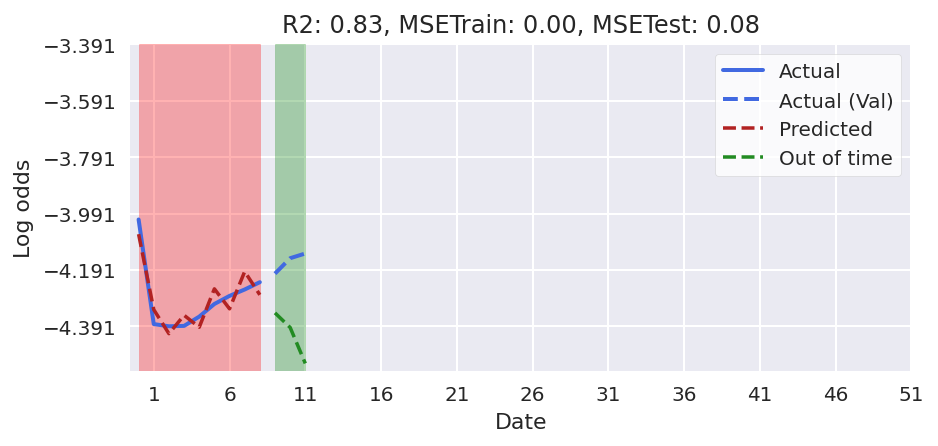

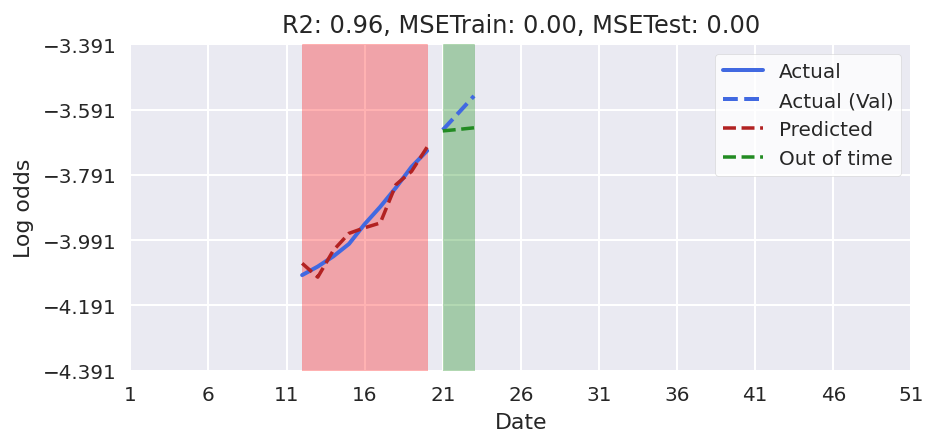

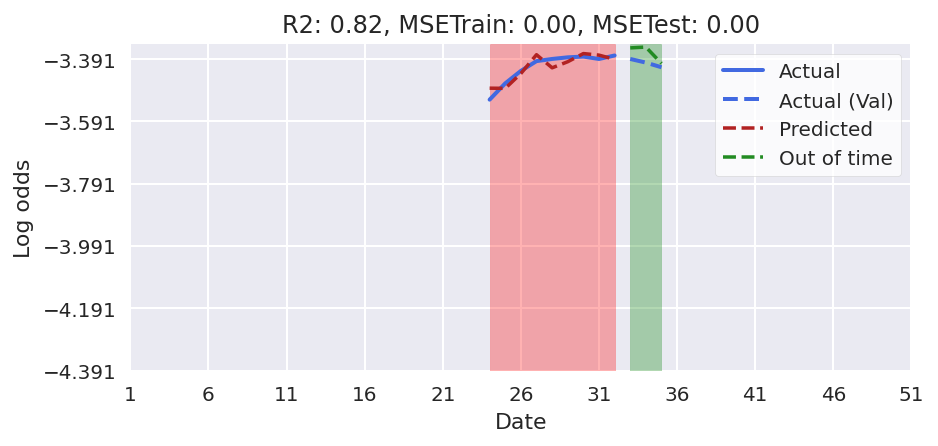

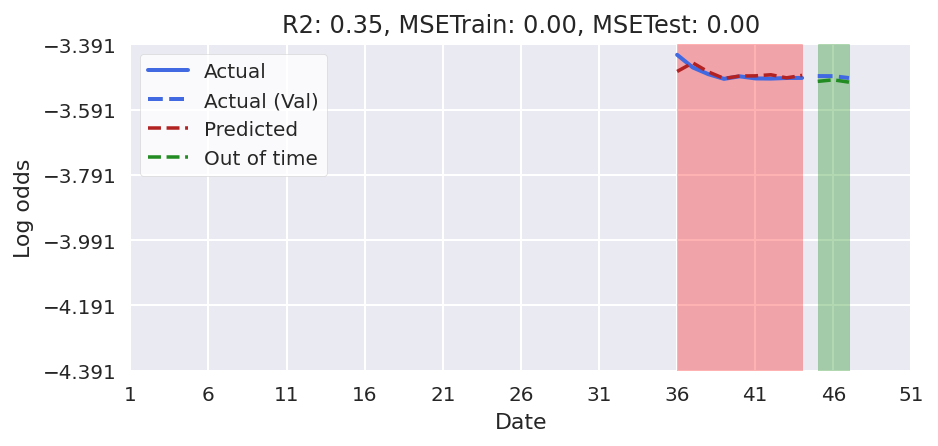

In [18]:
# Time series sliding window validation
results, _ = timeSlide(X, y, 9, 3, True)

In [19]:
# Average scores
scores = pd.DataFrame(results, columns = ['R2Train', 'MSETrain', 'MSETest'])
scores.index = scores.index + 1
scores.loc['Average'] = scores.mean()
scores = scores.reset_index().rename(columns = {'index': 'K-Fold'})
scores

,K-Fold,R2Train,MSETrain,MSETest
0,1,0.826397,0.002217,0.077340
1,2,0.955118,0.000747,0.004024
2,3,0.815177,0.000391,0.001299
3,4,0.350190,0.000348,0.000185
4,Average,0.736720,0.000926,0.020712


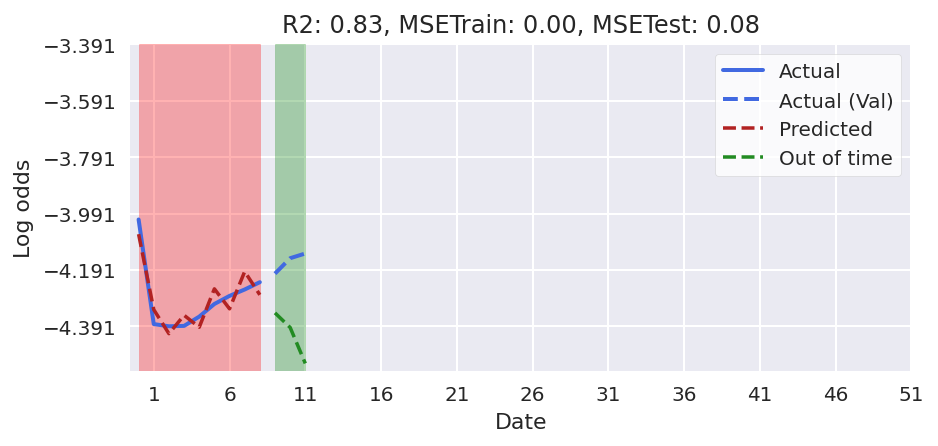

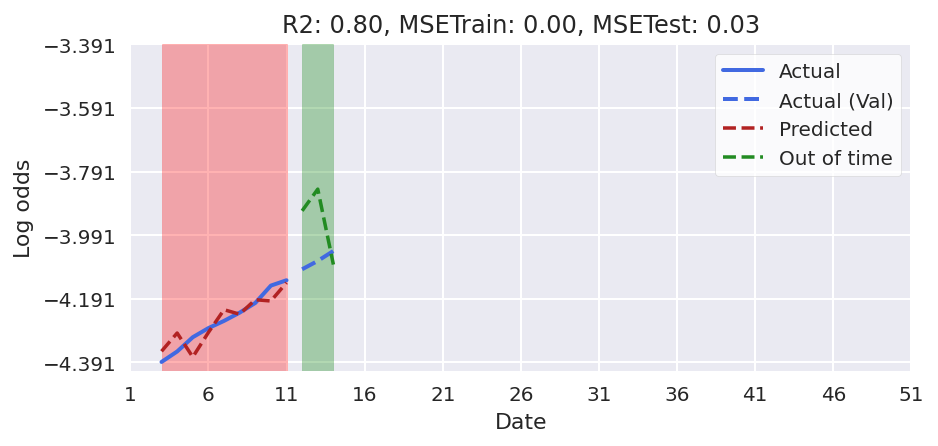

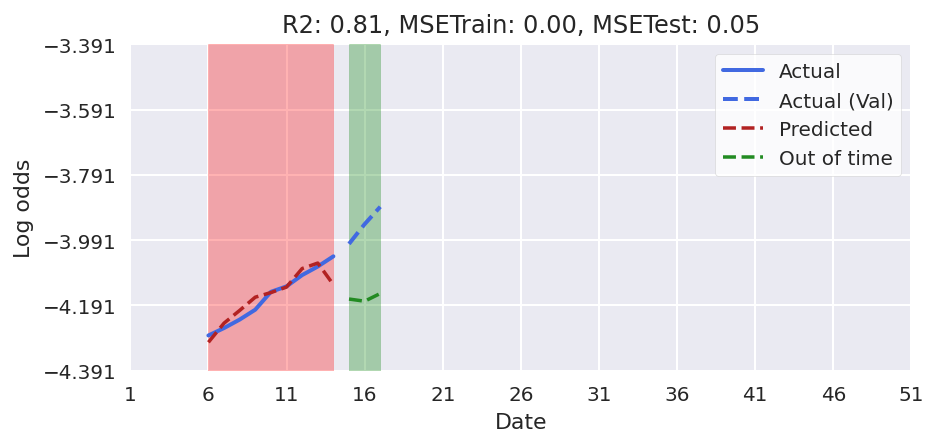

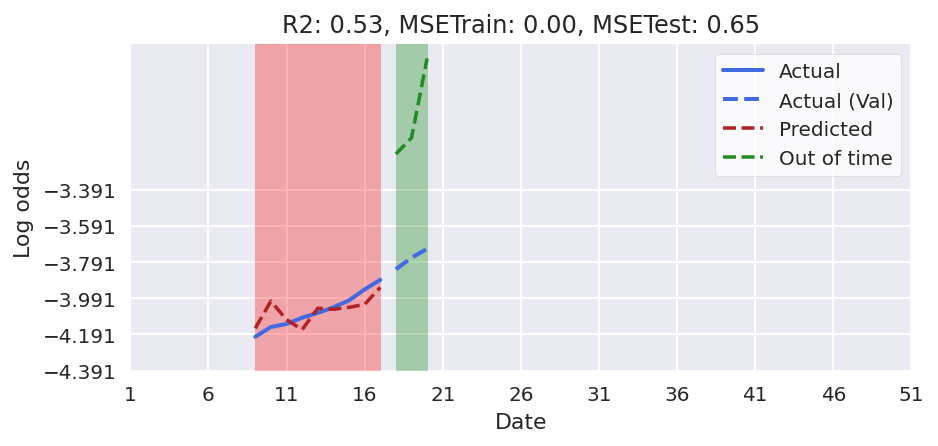

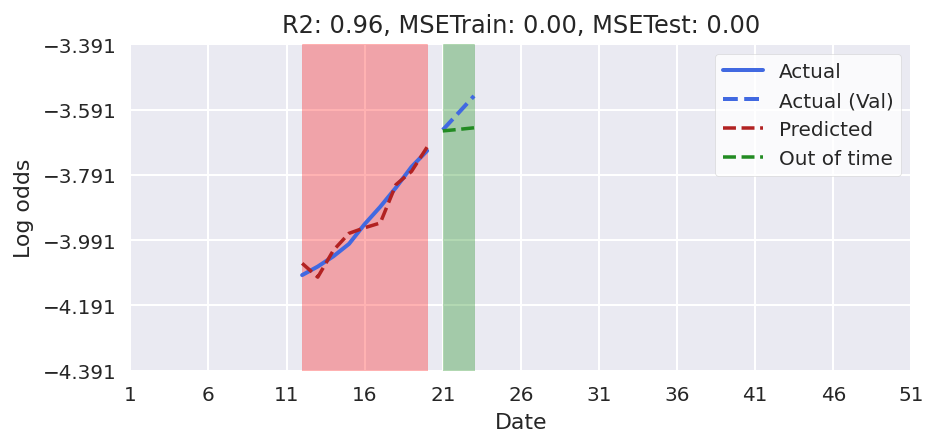

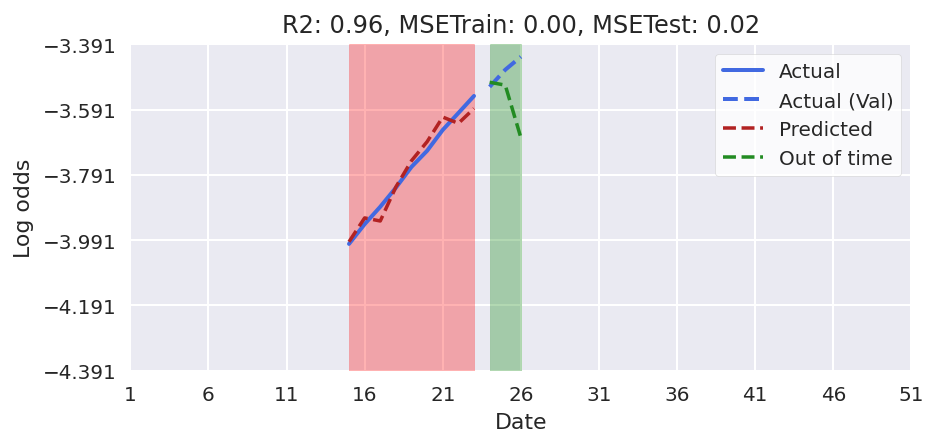

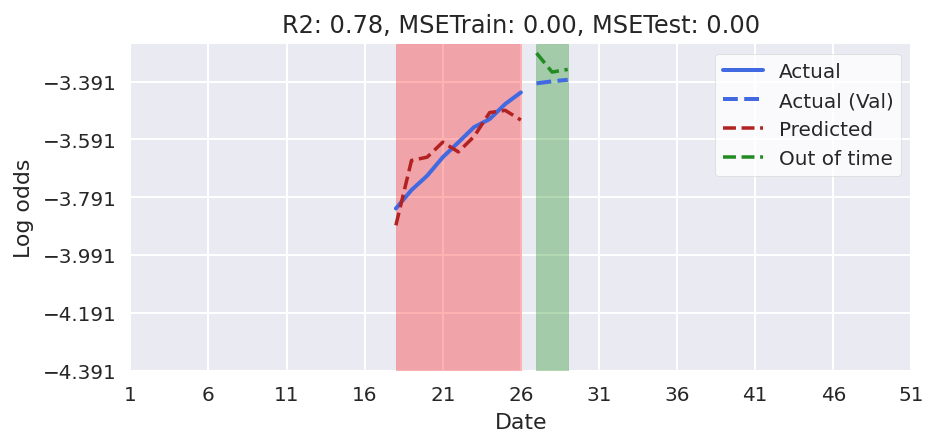

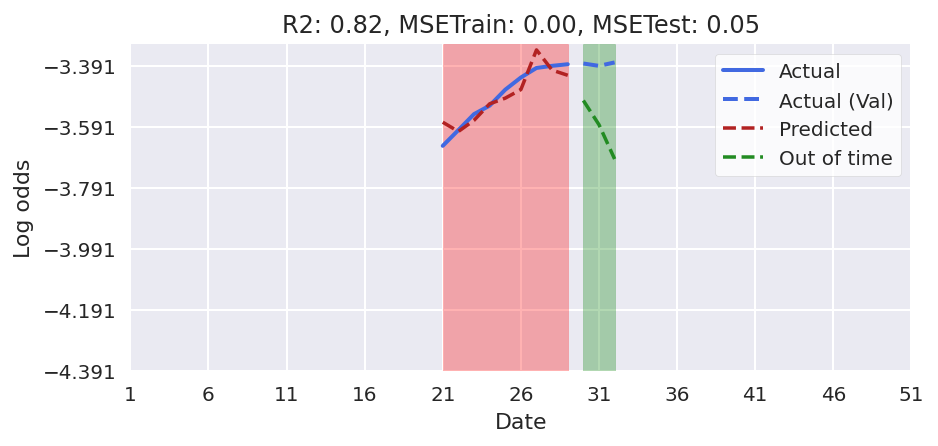

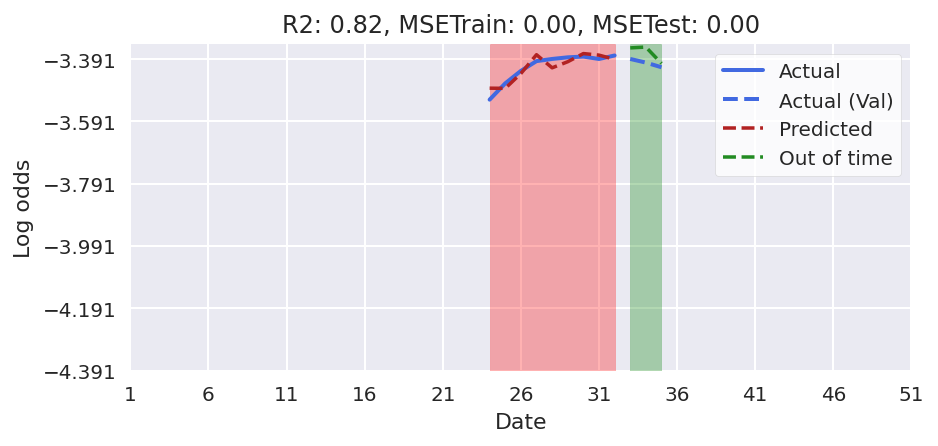

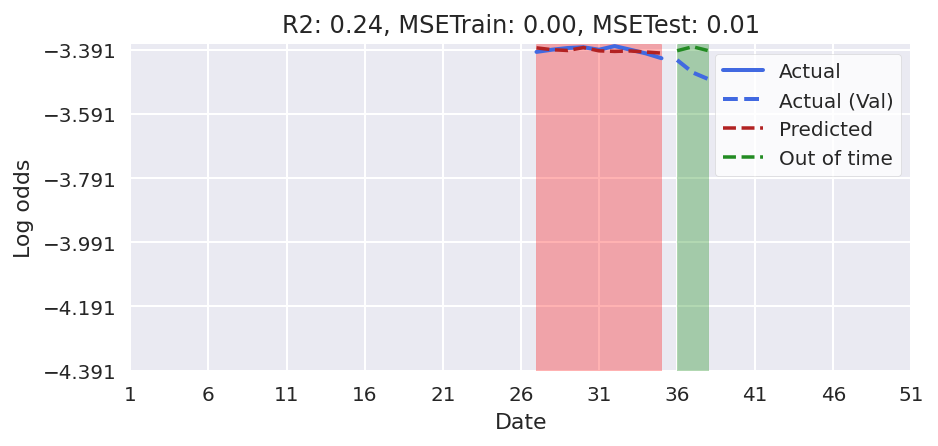

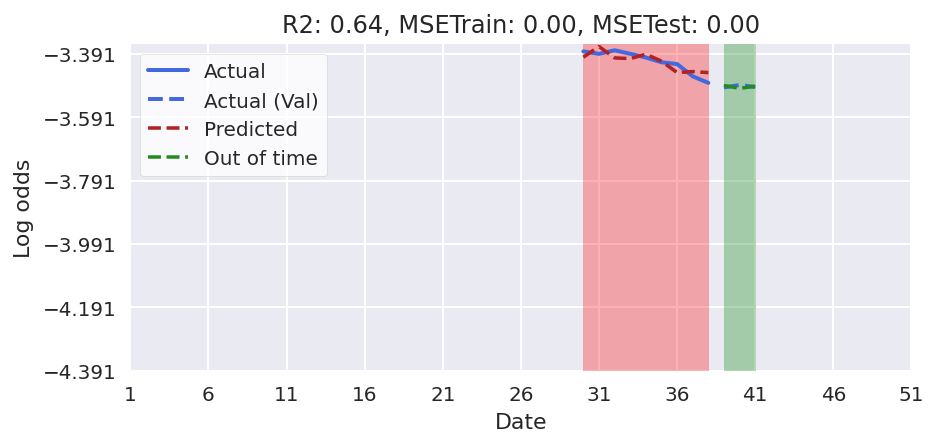

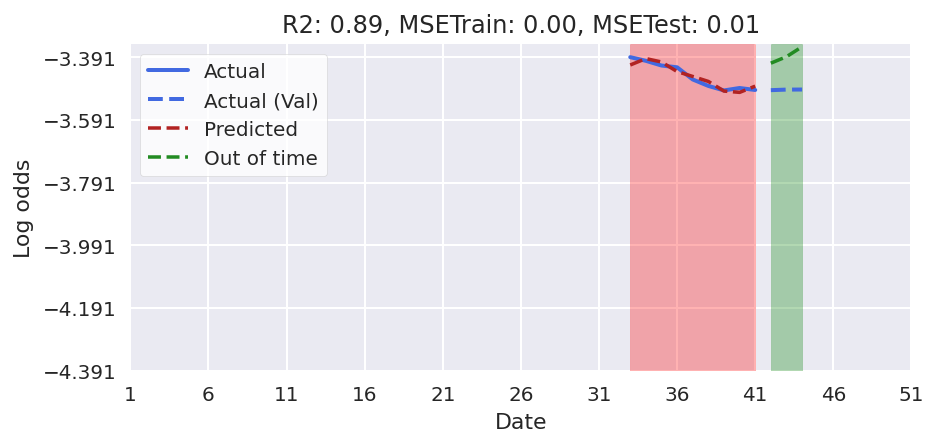

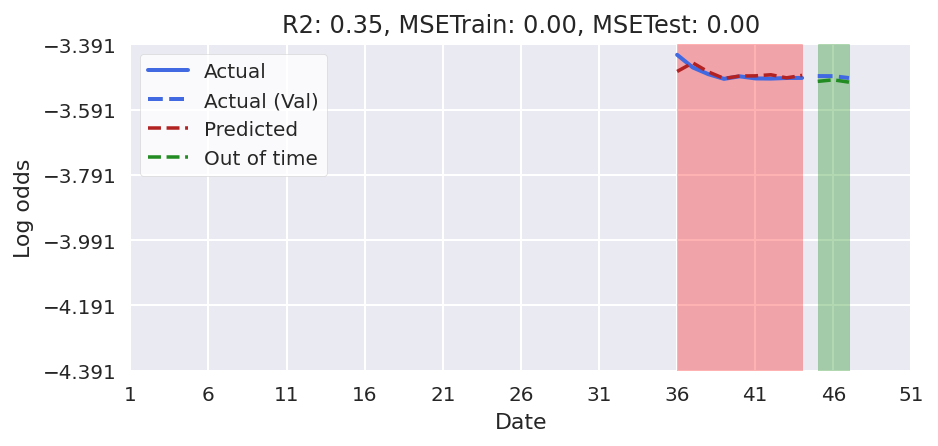

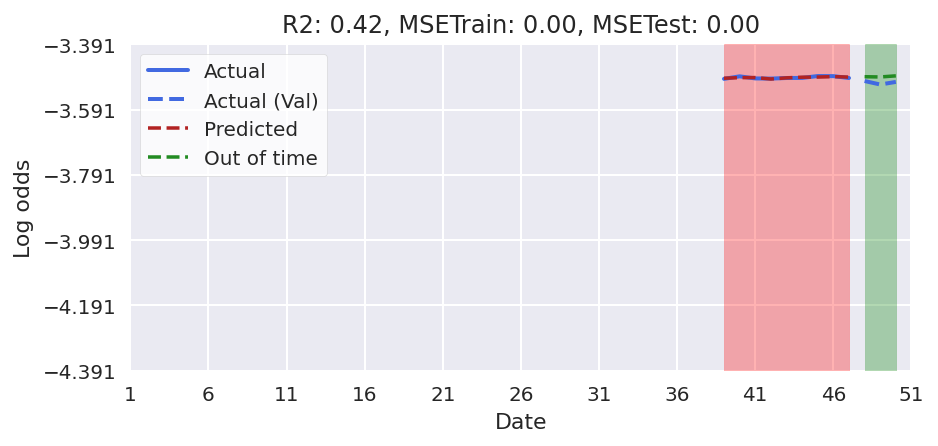

In [20]:
# Time series sliding window validation
results, _ = timeSlide(X, y, 9, 3, False)

In [21]:
# Average scores
scores = pd.DataFrame(results, columns = ['R2Train', 'MSETrain', 'MSETest'])
scores.index = scores.index + 1
scores.loc['Average'] = scores.mean()
scores = scores.reset_index().rename(columns = {'index': 'K-Fold'})
scores

,K-Fold,R2Train,MSETrain,MSETest
0,1,0.826397,0.002217,0.077340
1,2,0.799666,0.001371,0.028867
2,3,0.814897,0.001221,0.051699
3,4,0.534017,0.004279,0.652192
4,5,0.955118,0.000747,0.004024
5,6,0.961706,0.000830,0.021343
6,7,0.780695,0.003669,0.004432
7,8,0.820253,0.001540,0.050872
8,9,0.815177,0.000391,0.001299
9,10,0.243820,0.000089,0.005062
